In [489]:
# common 
import os
import numpy as np
import pandas as pd


# warnings
import warnings
warnings.filterwarnings('ignore')

In [490]:
#import data file
df = pd.read_csv('Data\gamessales.csv')

In [491]:
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [492]:
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [493]:
df.shape

(16598, 11)

In [494]:
#column type
df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [495]:
#drop name
df.drop('Name', axis=1, inplace=True)


In [496]:
#drop Global_sales min value 0.5
df.drop(df[df['Global_Sales'] < 0.15].index, inplace=True)

df


,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
8988,8990,PSV,2013.0,Action,Tecmo Koei,0.04,0.03,0.05,0.02,0.15
8989,8991,DS,2013.0,Action,Activision,0.00,0.13,0.00,0.02,0.15
8990,8992,GBA,2004.0,Action,Crave Entertainment,0.10,0.04,0.00,0.00,0.15
8991,8993,DS,2008.0,Shooter,Ignition Entertainment,0.13,0.00,0.01,0.01,0.15


<AxesSubplot: xlabel='Genre', ylabel='Global_Sales'>

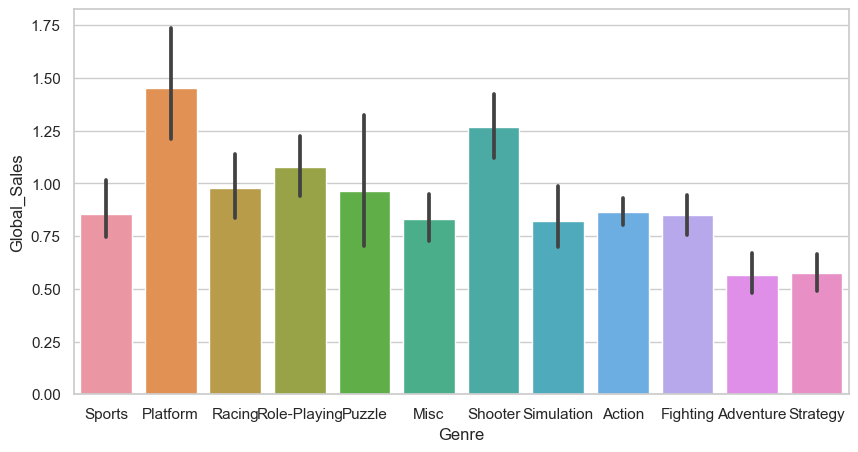

In [497]:
#made graph with seaborn and use Genre and Global_Sales
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='Global_Sales', data=df)


<AxesSubplot: ylabel='Publisher'>

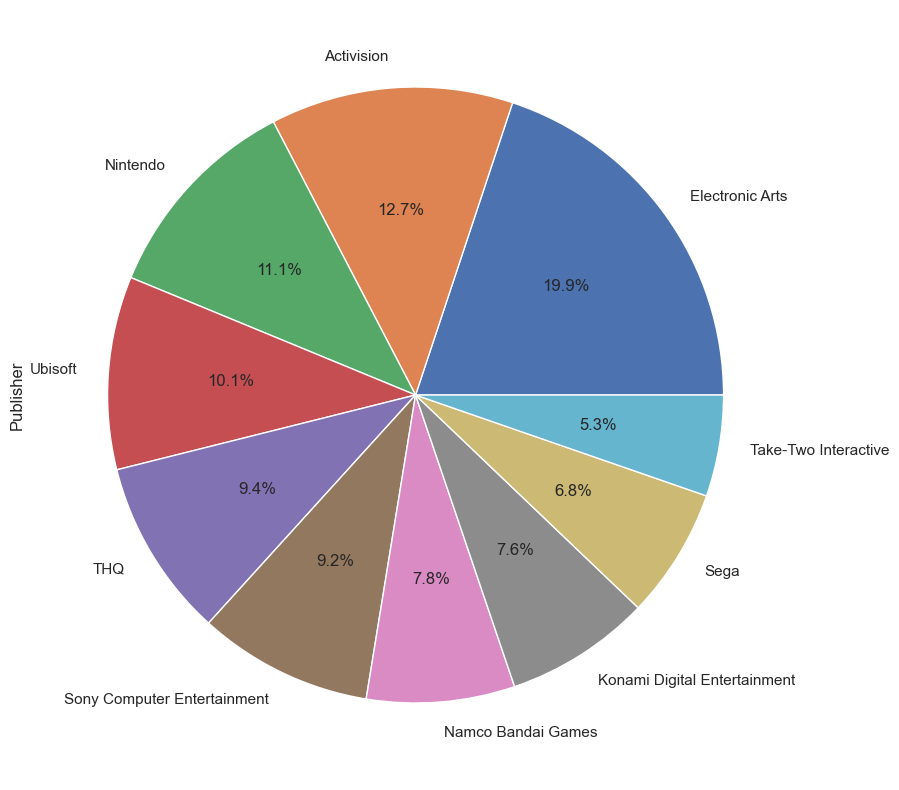

In [498]:
#create pie chart with seaborn and use publisher
plt.figure(figsize=(10,10))
df['Publisher'].value_counts().head(10).plot.pie(autopct='%1.1f%%')


<AxesSubplot: ylabel='Platform'>

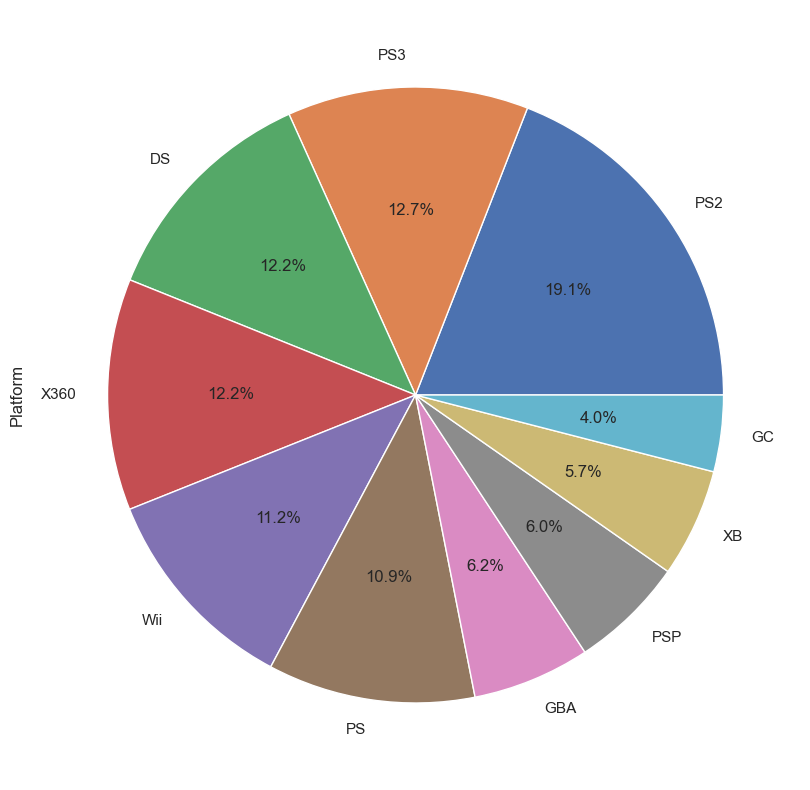

In [499]:
#create pie chart with seaborn and use Platform
plt.figure(figsize=(10,10))
df['Platform'].value_counts().head(10).plot.pie(autopct='%1.1f%%')

<AxesSubplot: xlabel='Year', ylabel='Global_Sales'>

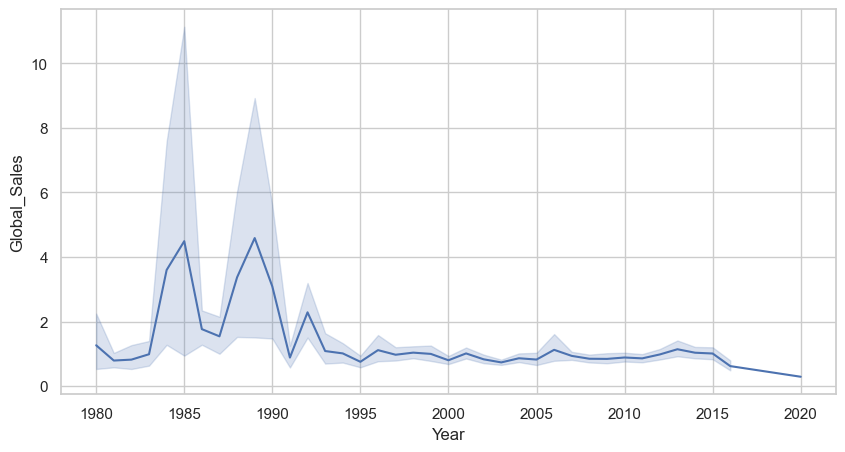

In [500]:
#create line chart with seaborn and use Year and Global_Sales
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Global_Sales', data=df)


In [501]:
#drop NG SNES from platform
df.drop(df[df['Platform'] == 'NG'].index, inplace=True)
df.drop(df[df['Platform'] == 'SNES'].index, inplace=True)



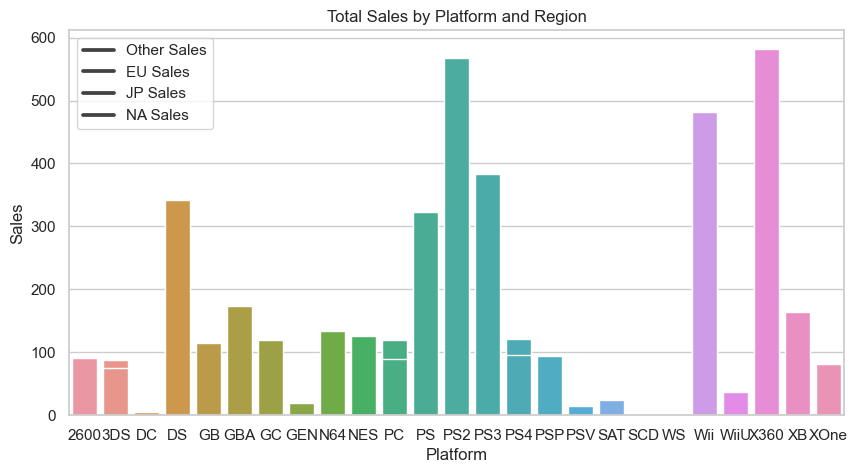

In [502]:
#lets see platform and region sales
sales_by_region = df.groupby('Platform')[['Other_Sales', 'EU_Sales', 'JP_Sales', 'NA_Sales']].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_region.index, y='Other_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='EU_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='JP_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='NA_Sales', data=sales_by_region)
plt.legend(labels=['Other Sales', 'EU Sales', 'JP Sales', 'NA Sales'])
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Total Sales by Platform and Region')
plt.show()


In [503]:
#drop low count platform
platform_counts = df.groupby('Platform').size()
low_count_platforms = platform_counts[platform_counts < 200].index.tolist()
df.drop(df[df['Platform'].isin(low_count_platforms)].index, inplace=True)


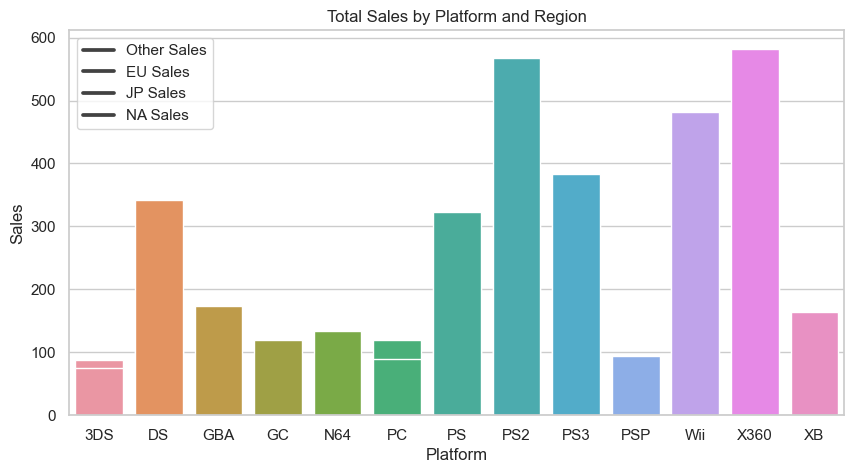

In [504]:

sales_by_region = df.groupby('Platform')[['Other_Sales', 'EU_Sales', 'JP_Sales', 'NA_Sales']].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_region.index, y='Other_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='EU_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='JP_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='NA_Sales', data=sales_by_region)
plt.legend(labels=['Other Sales', 'EU Sales', 'JP Sales', 'NA Sales'])
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title('Total Sales by Platform and Region')
plt.show()


<AxesSubplot: xlabel='Year'>

<Figure size 1000x500 with 0 Axes>

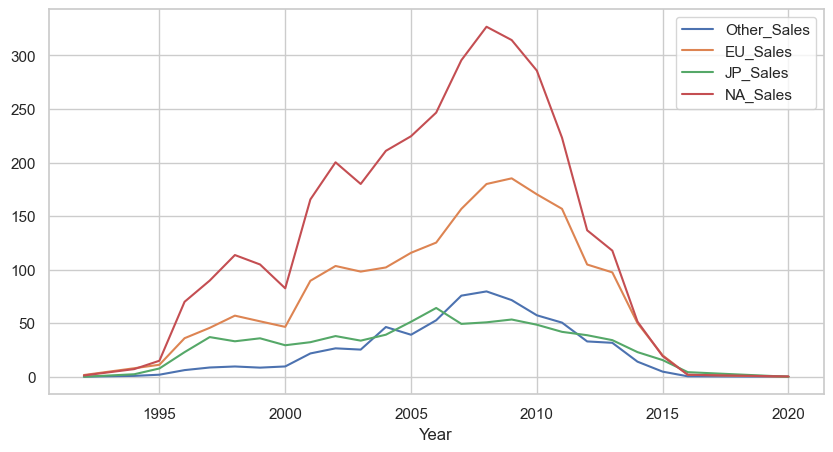

In [505]:
sales_by_region = df.groupby('Year')[['Other_Sales', 'EU_Sales', 'JP_Sales', 'NA_Sales']].sum()
plt.figure(figsize=(10,5))
sales_by_region.plot(kind='line', figsize=(10,5))

In [506]:
#drop after 2016
df.drop(df[df['Year'] > 2016].index, inplace=True)

#drop before 1990
df.drop(df[df['Year'] < 1990].index, inplace=True)



<AxesSubplot: xlabel='Year'>

<Figure size 1000x500 with 0 Axes>

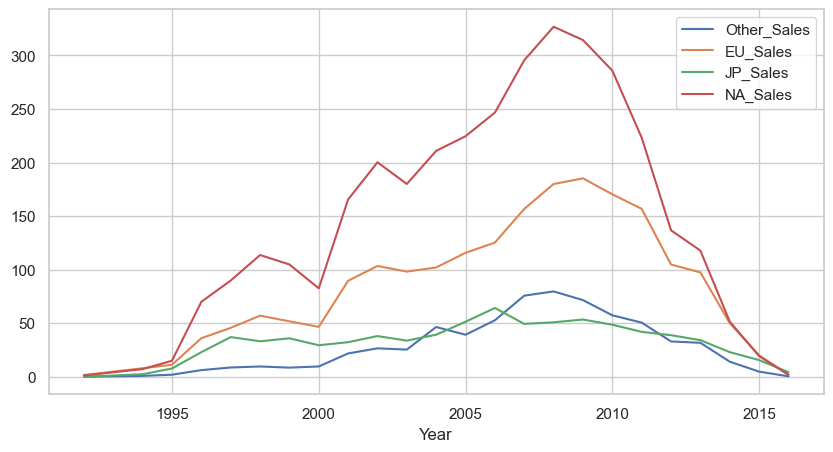

In [507]:
sales_by_region = df.groupby('Year')[['Other_Sales', 'EU_Sales', 'JP_Sales', 'NA_Sales']].sum()
plt.figure(figsize=(10,5))
sales_by_region.plot(kind='line', figsize=(10,5))

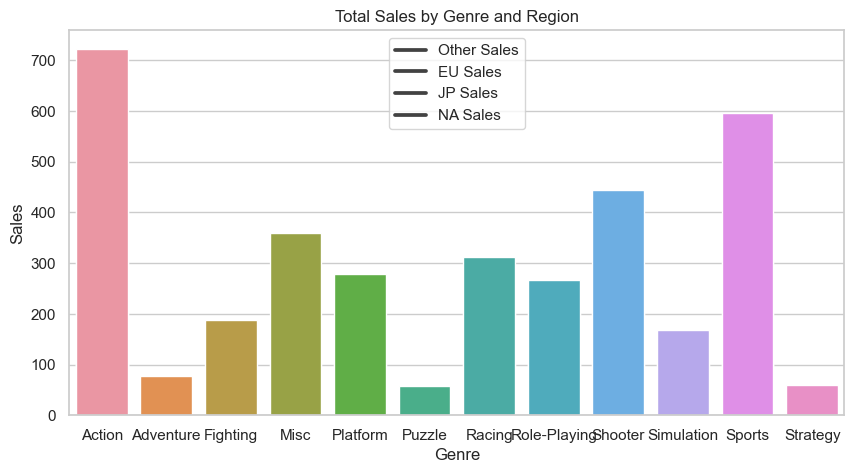

In [508]:
#genre and region sales
sales_by_region = df.groupby('Genre')[['Other_Sales', 'EU_Sales', 'JP_Sales', 'NA_Sales']].sum()
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_region.index, y='Other_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='EU_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='JP_Sales', data=sales_by_region)
sns.barplot(x=sales_by_region.index, y='NA_Sales', data=sales_by_region)
plt.legend(labels=['Other Sales', 'EU Sales', 'JP Sales', 'NA Sales'])
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title('Total Sales by Genre and Region')
plt.show()


In [509]:
#before the create model drop outside global sales
df.drop(['JP_Sales','EU_Sales','Other_Sales','NA_Sales'], axis=1, inplace=True)
df

,Rank,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii,2006.0,Sports,Nintendo,82.74
2,3,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii,2009.0,Sports,Nintendo,33.00
6,7,DS,2006.0,Platform,Nintendo,30.01
7,8,Wii,2006.0,Misc,Nintendo,29.02
...,...,...,...,...,...,...
8987,8989,PS,1995.0,Role-Playing,Sony Computer Entertainment,0.15
8989,8991,DS,2013.0,Action,Activision,0.15
8990,8992,GBA,2004.0,Action,Crave Entertainment,0.15
8991,8993,DS,2008.0,Shooter,Ignition Entertainment,0.15


In [510]:
df.isna().sum()

Rank              0
Platform          0
Year            121
Genre             0
Publisher        28
Global_Sales      0
dtype: int64

In [511]:
df.dropna(inplace=True)

In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709 entries, 0 to 8992
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          7709 non-null   int64  
 1   Platform      7709 non-null   object 
 2   Year          7709 non-null   float64
 3   Genre         7709 non-null   object 
 4   Publisher     7709 non-null   object 
 5   Global_Sales  7709 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 421.6+ KB


In [513]:
df.fillna(df.mean(), inplace=True)

In [514]:
LabelEncoder=LabelEncoder()

In [515]:
# encoding the Platform type with label encoder
df['Platform'] = LabelEncoder.fit_transform(df['Platform'])

# encoding the Genre with label encoder
df['Genre'] = LabelEncoder.fit_transform(df['Genre'])

# encoding the Publisher type with label encoder
df['Publisher'] = LabelEncoder.fit_transform(df['Publisher'])

In [516]:
df.head()

,Rank,Platform,Year,Genre,Publisher,Global_Sales
0,1,10,2006.0,10,152,82.74
2,3,10,2008.0,6,152,35.82
3,4,10,2009.0,10,152,33.00
6,7,1,2006.0,4,152,30.01
7,8,10,2006.0,3,152,29.02


In [517]:
#create model target global sales
Y = df['Global_Sales']
X = df.drop('Global_Sales', axis=1)


In [518]:
X.head(),X.shape

(   Rank  Platform    Year  Genre  Publisher
 0     1        10  2006.0     10        152
 2     3        10  2008.0      6        152
 3     4        10  2009.0     10        152
 6     7         1  2006.0      4        152
 7     8        10  2006.0      3        152,
 (7709, 5))

In [519]:
Y.head(),Y.shape

(0    82.74
 2    35.82
 3    33.00
 6    30.01
 7    29.02
 Name: Global_Sales, dtype: float64,
 (7709,))

In [520]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6167, 5), (1542, 5), (6167,), (1542,))

In [525]:
#Training the model
regr = RandomForestRegressor(n_estimators=1500, max_depth=50, random_state=42)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=50, n_estimators=1500, random_state=42)

In [526]:
#make predictions
predictions = regr.predict(X_test)

Text(0.5, 1.0, 'Predictions vs Actual')

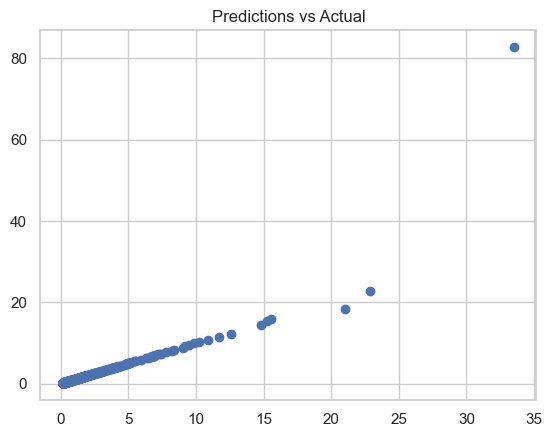

In [527]:
plt.scatter(predictions,y_test)
plt.title('Predictions vs Actual')

In [528]:
# score on train data
regr.score(X_train, y_train)


0.999630685204142

In [529]:
# mse
mse = mean_squared_error(y_test.values.ravel(), predictions)

# mae
mae = mean_absolute_error(y_test.values.ravel(), predictions)

# r2
r2 = r2_score(y_test.values.ravel(), predictions)



In [530]:
# results
print(f"MSE: {round(mse, 2)}") # type: ignore
print(f"MAE: {round(mae, 2)}")# type: ignore
print(f"R2 Score: {round(r2, 2)}")# type: ignore

MSE: 1.58
MAE: 0.04
R2 Score: 0.77


In [524]:
# from sklearn.ensemble import VotingRegressor
# from sklearn.linear_model import LinearRegression, LogisticRegression
# from xgboost import XGBRegressor
# from sklearn.metrics import mean_squared_error

# # Define the individual models
# rf_model = RandomForestRegressor(n_estimators=1500, max_depth=50, random_state=42)
# lr_model = LinearRegression()
# xgb_model = XGBRegressor(random_state=42)

# # Define the voting regressor
# voting_regressor = VotingRegressor(estimators=[
#     ('rf', rf_model),
#     ('lr', lr_model),
#     ('xgb', xgb_model)
# ])

# # Fit the voting regressor to the training data
# voting_regressor.fit(X_train, y_train)

# # Make predictions using the voting regressor
# ensemble_preds = voting_regressor.predict(X_test)

# # Calculate and print the mean squared error of the voting regressor
# ensemble_mse = mean_squared_error(y_test, ensemble_preds)



# #print model score
# print('Ensemble MSE: {:.2f}'.format(ensemble_mse))

# print('Ensemble RMSE: {:.2f}'.format(np.sqrt(ensemble_mse)))

# print('Ensemble R2: {:.2f}'.format(r2_score(y_test, ensemble_preds)))


Ensemble MSE: 2.43
Ensemble RMSE: 1.56
Ensemble R2: 0.64


In [522]:
parameters = {
    'max_depth': [50, 70, 100, 150, 200, 300, 500 ],
    'n_estimators': [100, 200, 300, 500, 1000, 1250, 1500]
}

In [523]:
gridforest = GridSearchCV(rf_model, parameters, cv=3, n_jobs=-1)
gridforest.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(max_depth=50, n_estimators=1500,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [50, 70, 100, 150, 200, 300, 500],
                         'n_estimators': [100, 200, 300, 500, 1000, 1250,
                                          1500]})